# Homework 7

## PHYS 2600

__Important notice:__ All cells in your notebook will be run, start to finish, using a fresh kernel when it is graded! To make sure the graded notebook looks like what you expect, we recommend selecting "Runtime > Restart session and run all" from the menu above in Colab before you finish.

In [2]:
# Import cell

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

If you worked collaboratively on this assignment, __include the names of your collaborators in the cell below:__

Just me

## 7.0 - Homework correction (3 points)

In the cell below, explain and correct __one mistake__ you made on homework #5.  If you got a perfect score, great, tell us what your favorite problem was, or use the space to give any other feedback you might have on the class/tutorials/homework.

I'm alright in terms of programming I can understand a bit but some of the homeworks has been takin a great time to solve which a strange thing

## 7.1 - More fun with lists (11 points)

__Important instruction:__ Your solution to all of the problems below _must_ use list operations to manipulate the starting lists you are given, in order to produce the answer.  Just entering the answer by hand as a new list is worth no credit!

Run the cell below to initialize some lists that you'll have to manipulate in your answers.

In [18]:
# Initialization cell - run me first!

SI_smaller_prefixes = ["milli", "micro", "nano", "pico"]
SI_bigger_prefixes = ["kilo", "mega", "giga", "tera"]

material_names = ["water", "selenium", "quartz", "potassium"]
melting_points = [0, 220, 1470, 63]
boiling_points = [100, 688, 2230, 762]

### Part A (3 points)

__Combine the lists__ `SI_smaller_prefixes` and `SI_bigger_prefixes` into a single list called `SI_prefixes`.  Make sure your combined list is __in order, from smallest to largest prefix (i.e. pico to tera).__

_(Hint: there is more than one way to do this, including a clever way involving slicing.  The straightforward solution is just to loop over both lists and build the new one piece by piece.)_

In [21]:
#
SI_prefixes = SI_smaller_prefixes[::-1] # I like the slicing method of revresing the order
SI_prefixes.extend(SI_bigger_prefixes) # and here we just extend the list
print(SI_prefixes)

['pico', 'nano', 'micro', 'milli', 'kilo', 'mega', 'giga', 'tera']


In [22]:
assert SI_prefixes == ["pico", "nano", "micro", "milli", "kilo", "mega", "giga", "tera"]

### Part B (3 points)

Three related lists above contain the names of some materials, their melting points (in degrees C), and their boiling points (also degrees C).  Combine them to __create a single list__ `material_melt_boil_points`, which consists of  __smaller lists of the form:__ `[material name, melting point, boiling point]`.  (Have a look at the testing cell to see what this is supposed to look like.)

In [23]:
#
material_melt_boil_points = []
for i in range(len(material_names)):
    material_melt_boil_points.append([material_names[i], melting_points[i], boiling_points[i]])

In [24]:
solution_materials_list = [
    ["water", 0, 100],
    ["selenium", 220, 688],
    ["quartz", 1470, 2230],
    ["potassium", 63, 762],
]
assert material_melt_boil_points == solution_materials_list

### Part C (5 points)

Now that we've met lists, we have a new way to look at our old friend the _string_.  A string is a __sequence__, just like a list or array: it is an ordered set of objects.  In the case of a string, the objects it is made of must be __characters__ - single letters, numbers, punctuation marks, etc.


Many of the methods we've seen for lists also work as expected on strings, including indexing, slicing, and `len`.  We can even use a `for` loop to iterate over a string, which gives us one character at a time:

In [25]:
## Example code - run me

s = "abcxyz"
print(s[1])
print(len(s))
print(s[3:6])
print()

print("For loop below:")
for char in s:
    print(char)

b
6
xyz

For loop below:
a
b
c
x
y
z


Using your list knowledge, __implement the function `count_vowels_and_ys`__ below, which should return the number of vowels and ys in the given string.  (Vowels are the letters `'aeiou'`, we are including `'y'` in this function.)

In [28]:
def count_vowels_and_ys(s):
    #
    count = 0
    for char in s:
        if char in 'aeiouy': # checking if the letter is a vowel + 'y'
            count += 1
    return count

In [29]:
# TESTING CELL
assert count_vowels_and_ys("apple") == 2
assert count_vowels_and_ys("newtonian") == 4
assert count_vowels_and_ys("python") == 2

In [30]:
# TESTING CELL
assert count_vowels_and_ys("qrstvwxz") == 0
assert count_vowels_and_ys("nyx") == 1
assert count_vowels_and_ys("opera") == 3

## 7.2 - Spring equilibrium beyond Hooke's law (10 points)

Hooke's law states that the force exerted by a spring is proportional to the distance $x$ by which it is extended, $F = -kx$, where $k$ is the spring constant.  Equivalently, the potential energy $U$ stored in a stretched spring is equal to

$$
U(x) = \frac{1}{2} kx^2.
$$

However, Hooke's law only holds if $x$ is relatively small; a spring stretched sufficiently far will begin to show a _non-linear response_, i.e. the force will deviate from $F = -kx$.  The details of how the spring's behavior changes depends on its material and construction, but we can consider a simple model based on a quartic potential energy:

$$
U(x) = \frac{1}{2} kx^2 - p x^3 + q x^4
$$

where $p$ and $q$ are positive constants.  (Notice the energy is __not symmetric about $x=0$__; we're modeling only the behavior at positive $x$, i.e. for a stretched spring.  In general we might expect a spring to respond differently to extreme stretching and extreme compression.)

Let's take some concrete numerical values: for simplicity we'll set $k = 1.5 \ N/m$, and then take $p = 0.94\ N/m^2$ and $q = 0.3\ N/m^3$.  The first term (Hooke's law) is a good approximation to the behavior of the spring up to about 10 cm away from $x=0$, and then the potential energy becomes significantly different.

__Run the cell below__ to make a plot of $U(x)$, so you can get a sense for what's going on.  Remember, Hooke's law should give a quadratic potential; you can see that the potential _does_ look parabolic if you get close enough to $x=0$.

(0.0, 0.4)

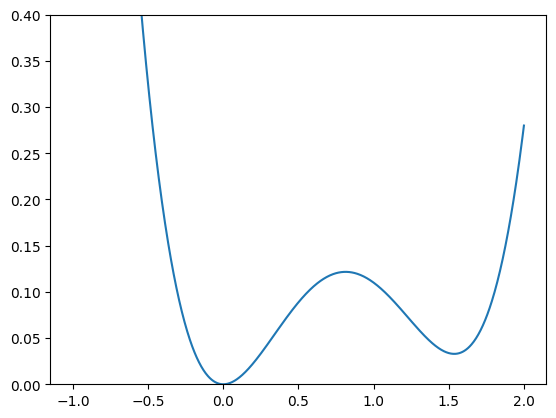

In [31]:
def U(x):
    k = 1.5  # N/m
    p = 0.94  # N/m^2
    q = 0.3  # N/m^3

    return 0.5 * k * x**2 - p * x**3 + q * x**4


x = np.linspace(-1, 2, 1000)
plt.plot(x, U(x))
plt.ylim(0, 0.4)

### Part A (3 points)

__Implement the negative derivative of potential energy -U'(x)__, which is equal to the net force, as `net_force(x)` below.  We'll keep the numerical spring constants all fixed for this problem, so $x$ should be the only argument to your function.  (You can copy the values of k,p,q from the plotting cell above.)

In [38]:
def net_force(x):
    #
    k = 1.5  # N/m
    p = 0.94  # N/m^2
    q = 0.3  # N/m^3
    return -1*(k * x - p * 3*x**2 + q * 4*x**3)



In [39]:
# TESTING CELL
import numpy.testing as npt

npt.assert_allclose(net_force(0), 0.0)
npt.assert_allclose(net_force(0.65), -0.1131, atol=1e-4)
npt.assert_allclose(net_force(0.44), -0.2163, atol=1e-4)

### Part B (7 points)

Now we'd like to find the _points of equilibrium_ $x_0$, where the spring will remain at rest.  In addition to the obvious equilibrium point at $x=0$, for the numerical values chosen there are _two more_ points of equilibrium at positive $x$.  (Convince yourself from the plot of $U(x)$ that this is true, or make a plot of the net force!)

__Find the two non-zero points of equilibrium__ for this system (in meters), and save them in the variables `x0_A` and `x0_B` below; it doesn't matter which root you store in which variable.  

This is a root-finding problem using the `net_force()` function you implemented above.  There are two ways you may approach this problem:

1. Copy your implementation of the bisection root finder from tutorial 8 into this notebook, and use that;
2. Use one of the root-finding algorithms from the `scipy.optimize` module.  I won't give you help here, it's up to you to [read the scipy documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html) and figure out how to use an appropriate algorithm!

A good way to check what you're doing is to make sure you can numerically locate the equilibrium point at $x=0$ before you proceed to the other two.  

_(Note: of course, there are analytic ways to find the roots in this case, which you can use to check your answer if you like.  But you won't get any credit for your answer unless you have a complete Python solution here!)_

In [ ]:
# Put your bisection algorithm here, or use this cell
# to import what you need from the scipy module.

#


In [ ]:
# Save the points of equilibrium you find in the two variables below!
x0_A = 0
x0_B = 0

#

In [ ]:
# TESTING CELL
correct_roots_one = (abs(x0_A - 0.813579) < 1e-4) and (abs(x0_B - 1.53642) < 1e-4)
correct_roots_two = (abs(x0_B - 0.813579) < 1e-4) and (abs(x0_A - 1.53642) < 1e-4)

assert correct_roots_one or correct_roots_two

## 7.3 - A taste of cryptography (16 points)

As we saw in problem 7.1 above, strings are sequences that can be treated similarly to lists in some ways.  The most immediate and interesting application of this sort of character-level string manipulation is __cryptography__, or secure communications.

The idea is simple: if we can devise a secret algorithm to __encode__ a message by converting it from plain text into something unreadable, and if the algorithm is reversible so we can __decode__ the message back to plain text, then we have a way to send messages to another person so that any third party who doesn't know the algorithm can't intercept and read them.

For simplicity, let's focus only on __messages in English consisting of lower-case letters__.  (It's not any harder to do mixed upper-case and lower-case letters, just more complicated.)  One of the simplest classes of cryptographic algorithms are the ROT, or "rotation", algorithms.  The __ROT(n)__ algorithm takes each letter in a message, and "rotates" it around the alphabet by n places.  

So, for example, ROT(1) would map a --> b, b --> c, and so on (with the end wrapping around, so z --> a.)  The message `"hello"` becomes `"jfkkp"`; to 'decode' back to `"hello"` we just reverse the map.  The wrapping-around at the end is like counting on a clock (an hour after 12 is 1), so this is another example of _modular arithmetic_ - with 26 letters, we want to work __modulo 26__ (i.e. using `x % 26`.)

### Part A (6 points)

To implement a ROT algorithm, the first thing we need is a mapping between letters and their corresponding numbers.  Since letters are really stored as binary numbers underneath, we can just use the numeric representation that Python already has!

Given a single character `c`, the built-in function `ord(c)` converts it into the underlying number in the encoding scheme we are using (in this case, ASCII, which we discussed briefly back in lecture 3.)  The `chr()` function goes back the other way: for example,

In [40]:
print(ord("a"))
print(ord("z"))
print(chr(97))

97
122
a


As these results imply, the codes given by `ord()` for lower-case letters run continuously from 97 to 122.  However, this is a little annoying, since the modular arithmetic we'll need is much more natural to handle if our codes range from 0 to 25 instead.

We also need to think about how to handle things that _aren't_ lower-case letters.  Most messages will be harder to read without punctuation, and _much_ harder to read without spaces!  Keep this in mind as we're working towards implementing the full algorithm.  (Of course, space and punctuation also make it easier to guess the true message - so we would want to encode them for practical application.)

To make implementing the ROT(n) algorithm easier, __define three functions below__:

* `is_letter(c)` should accept a single character (length-one string), and return `True` if it is a lower-case letter and `False` otherwise.  _(Remember, `ord(c)` for any character will give you a code, and we just worked out which codes are lower-case letters...)_
* `char_to_num(c)` should also accept a single character.  If `c` is _not_ a lower-case letter, it should just return `c` back; otherwise, it should return 0 for `a`, 1 for `b`, and so on.  _(You should use_ `is_letter(c)` _here!)_
* `num_to_char(n)` is the inverse of `char_to_num`: it should accept a number from 0-25 and return the corresponding lower-case letter.

In [41]:
def is_letter(c):
    #
    if ord(c) >= 97 and ord(c) <= 122: # Checking letter number range
        return True
    else:
        return False


def char_to_num(c):
    #
    if is_letter(c):
        return ord(c) - 97
    else:
        return c


def num_to_char(n):
    #
    return chr(n + 97)

In [42]:
# TESTING CELL
assert is_letter("q")
assert not is_letter("3")
assert not is_letter("X")
assert not is_letter(".")

In [43]:
# TESTING CELL
assert char_to_num("z") == 25
assert char_to_num("n") == 13
assert char_to_num(" ") == " "
assert char_to_num("A") == "A"

In [44]:
# TESTING CELL
assert num_to_char(4) == "e"
assert num_to_char(23) == "x"

assert num_to_char(char_to_num("k")) == "k"
assert char_to_num(num_to_char(13)) == 13

### Part B (6 points)

Now __implement the ROT(n) algorithm__ in the function `encode_rot_n(message, n)` below.  Your function should return a string in which every lower-case letter is replaced by its 'rotated' equivalent, according to the value of `n` given as an argument.

A good test case to consider is ROT(13), which is particularly simple: the first half of the alphabet gets mapped to the second half, and vice versa.  So `'a'` --> `'m'` and `'m'` --> `'a`', and so on.

_(Hint: remember,_ `char_to_num` _returns either an `int` type or a `str` type, and you only want to apply the "rotation" if it gives you an `int` back!  A quick type check of the form `if type(...) == int:` should let you discriminate between lower-case letters and everything else in your code.)_

In [45]:
def encode_rot_n(message, n):
    # Already done that in C++ CSCI1300
    # The Logic is the same but the implemntation is different
    # betwean C++ and Python
    new_message = ""
    for i in range(len(message)):
        if type(char_to_num(message[i])) == int:
            new_message += num_to_char((char_to_num(message[i]) + n) % 26)
        else:
            new_message += message[i]

    return new_message

In [46]:
# TESTING CELL
assert encode_rot_n("colorado", 19) == "vhehktwh"
assert encode_rot_n("hello world", 13) == "uryyb jbeyq"
assert encode_rot_n("Testing upper case", 4) == "Tiwxmrk yttiv gewi"
assert encode_rot_n(encode_rot_n("back and forth!", 13), 13) == "back and forth!"

We only wrote a ROT(n) encoder, but you're now fully equipped to _decode_ messages as well!  The reason is simple: if we combine ROT(n) with ROT(26-n), then every letter in the resulting twice-encoded message has been rotated by 26 places - which means back to where it started!

In [47]:
encode_rot_n("yvccf nficu", 26 - 17)  # 'yvccf nficu' is 'hello world' in ROT(17)

'hello world'

### Part C (4 points)

Let's test out your codebreaking skills.  __The instructions for part C of this problem are encoded in ROT(n) below.__ (Which $n$?  If I told you, it would be too easy...)

_(Hint: if your decoded message looks messy and doesn't have any line breaks, use `print()` on it to get it to print out nicely.)_

In [59]:
instr_encoded = """
yvahapvu hsnvypaotz hyl uva clyf zljbyl.  pm dl zbzwlja h yvahapvu
hsnvypaot, dl vusf ullk av alza 26 clyzpvuz vm pa av kljvkl aol tlzzhnl.
lclu dvyzl, pa'z lhzf av nblzz doha u pz myvt jvttvu zpunsl-slaaly dvykz
sprl "p" huk "h" - fvb thf ohcl kvul aoha av kljvkl aopz, pu mhja.
jyfwavnyhwof pz vusf hz nvvk hz aol hsnvypaot dl bzl!

dl jhu chzasf ptwyvcl aol zljbypaf vm yva u if bzpun h vul-aptl whk.
vul-aptl whkz hyl h zlxblujl vm yhukvt pumvythapvu dopjo pz zohylk iladllu
adv wlvwsl dov dhua av zluk huk yljlpcl h tlzzhnl.  aopz aljoupxbl pz
buiylhrhisl pm aol vul-aptl whk pazlsm pz aybsf yhukvt, iba pa kvlz ylxbpyl
aol zlukly huk yljlpcly av tlla huk lejohunl aol whk ilmvylohuk.

ptwsltlua aol mbujapvu lujvkl_yva_u_vaw ilsvd.  aol chyphisl vul_aptl_whk zovbsk
il h svun zaypun vm svdly-jhzl slaalyz, dopjo dl ohcl hsylhkf thwwlk av ubtilyz
myvt 0 av 25.  zv aol mpyza johyhjaly pu tlzzhnl zovbsk il lujvklk dpao lujvkl_yva_u,
huk u lxbhs av johy_av_ubt() vm aol mpyza johyhjaly pu vul_aptl_whk, huk zv vu.

lujvkl_yva_u_vaw hszv pujsbklz h ivvslhu hynbtlua, kljvkl.  pm kljvkl pz aybl,
aolu fvb zovbsk zapss ylhk u myvt aol vul_aptl_whk, iba aolu yvahal if 26 - u.
pm fvb'cl kvul lclyfaopun jvyyljasf, fvb'ss il hisl av lujvkl huk kljvkl, huk
yljvcly aol tlzzhnl fvb zahyalk dpao.

dl ohcl av kljpkl ovd av klhs dpao uvu-slaalyz, vy aol kljvkpun thf mhps hmaly
aol mpyza zwhjl hwwlhyz.  tf ptwsltluahapvu "bzlz bw" h slaaly pu aol vul-aptl whk
dolu h uvu-slaaly pz mvbuk.  pu vaoly dvykz: pm aol aopyk johyhjaly pu aol tlzzhnl pz
h zwhjl, aolu aol aopyk johyhjaly pu aol vul-aptl whk pz bzlk bw, huk aol ulea johyhjaly
pz lujvklk dpao aol mvbyao myvt aol vul-aptl whk.  aopz pz h ipa dhzalmbs, iba pa'z
hszv h spaasl lhzply av ptwsltlua.  hnhpu, pm fvb kv aopz dyvun, fvb'ss ruvd iljhbzl
fvby kljvkpun dpss wyvkbjl vul dvyk huk aolu nhyihnl hmaly aol zwhjl!

aolyl hyl uv alzaz mvy aopz whya!  puzalhk, fvb tbza huzdly pu aol mpuhs
thyrkvdu jlss ilsvd: doha pz aol zljyla jvkl dvyk lujvklk pu tf shza tlzzhnl?

olyl pz fvby vul aptl whk av kljvkl aol shza tlzzhnl ilsvd:

lmavmpxxmkknbqhkqyzjyamdzlofucyqeqfasasbheehemeqwyfkispvyxunphjydzbneemyfrrwogxqxuakmkkpulvesakzczxwqbiz
"""

# # I want to do it using for loop:
# for i in range(12,22): # Found it it's 19
#   print("The Number is: " + str(i) + " " + encode_rot_n(instr_encoded, i))

# #

print(encode_rot_n(instr_encoded, 19))


rotation algorithms are not very secure.  if we suspect a rotation
algorithm, we only need to test 26 versions of it to decode the message.
even worse, it's easy to guess what n is from common single-letter words
like "i" and "a" - you may have done that to decode this, in fact.
cryptography is only as good as the algorithm we use!

we can vastly improve the security of rot n by using a one-time pad.
one-time pads are a sequence of random information which is shared between
two people who want to send and receive a message.  this technique is
unbreakable if the one-time pad itself is truly random, but it does require
the sender and receiver to meet and exchange the pad beforehand.

implement the function encode_rot_n_otp below.  the variable one_time_pad should
be a long string of lower-case letters, which we have already mapped to numbers
from 0 to 25.  so the first character in message should be encoded with encode_rot_n,
and n equal to char_to_num() of the first character in one_ti

In [49]:
def encode_rot_n_otp(message, one_time_pad, decode=False):
    #
    new_message = ""
    for i in range(len(message)):
        if type(char_to_num(message[i])) == int:
            if decode:
                new_message += num_to_char((char_to_num(message[i]) - char_to_num(one_time_pad[i])) % 26)
            else:
                new_message += num_to_char((char_to_num(message[i]) + char_to_num(one_time_pad[i])) % 26)
        else:
            new_message += message[i]

    return new_message

In [50]:
final_message = 'xmbg uuixdjk fiou kgcy-zwwaphxk fw mpg mezlnax...asvu swutvto.  pzy pbhicd lvqt yf "luddvxm".'

In [60]:
# Scratch space for you to figure this out...

#
PAD = "eftofiqqfddgujadjrscrtfwsehynvrjxjytltluaxxaxfxjprydbliorqngiacrwsugxxfrykkphzqjqntdfddineoxltdsvsqpjubs"
print(encode_rot_n_otp(final_message, PAD, True))

# This was a fun homework I really enjoy it and learned from it

this message will self-destruct in ten seconds...just kidding.  the secret word is "gravity".
